# Load Data

In [306]:
import pandas as pd
sample_data = pd.read_csv("../data/raw/train.csv")

/var/folders/jn/dc5313mj0qs72qr08qqw3w3r0000gn/T/ipykernel_87810/3757845114.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_data = pd.read_csv("../data/raw/train.csv")


In [307]:
sample_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [308]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [309]:
sample_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [310]:
sample_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [311]:
print(sample_data.duplicated().sum())

0


# Transformation

Date tranformation

In [312]:
sample_data["Date"]= pd.to_datetime(sample_data["Date"], errors= "coerce")
sample_data["Date"].dtype


dtype('<M8[ns]')

Filter only open stores

In [313]:
sample_data=sample_data.loc[sample_data["Open"]== 1]
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          844392 non-null  int64         
 1   DayOfWeek      844392 non-null  int64         
 2   Date           844392 non-null  datetime64[ns]
 3   Sales          844392 non-null  int64         
 4   Customers      844392 non-null  int64         
 5   Open           844392 non-null  int64         
 6   Promo          844392 non-null  int64         
 7   StateHoliday   844392 non-null  object        
 8   SchoolHoliday  844392 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 64.4+ MB


Agrupar por semana

In [314]:
sales_weekly= sample_data.groupby(pd.Grouper(key="Date", freq= "W"))["Sales"].sum().reset_index()

sales_weekly.head()

,Date,Sales
0,2013-01-06,26129335
1,2013-01-13,49275222
2,2013-01-20,34377765
3,2013-01-27,46040169
4,2013-02-03,38466029


In [315]:
sales_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    135 non-null    datetime64[ns]
 1   Sales   135 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.2 KB


Plot the weekly sales over the time

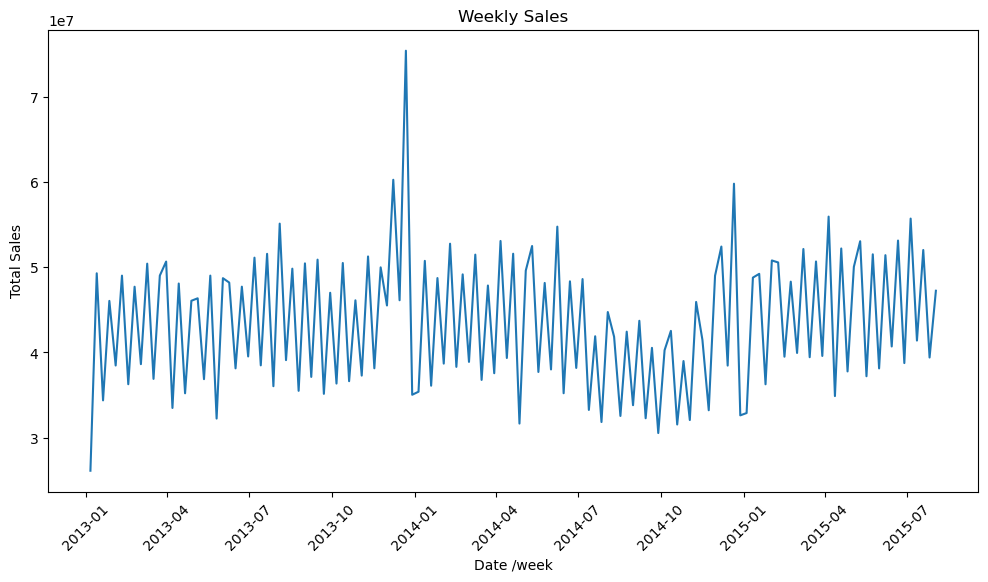

In [316]:
import matplotlib.pyplot as plt

# Data 
x= sales_weekly["Date"]
y= sales_weekly["Sales"]

# Plot
plt.figure(figsize=(12,6))
plt.plot(x,y)

#Labels

plt.xlabel("Date /week")
plt.ylabel("Total Sales")
plt.title("Weekly Sales")
plt.xticks(rotation=45)





plt.show()

Seasonal pattern is clearly visible. We can see clear peaks and valleys repeating roughly every few months.
That’s classic retail seasonality, usually tied to:

holidays (Christmas / New Year)

local events

trade promotions or product launches

Big spikes — that tall one around early 2014 is likely a major holiday campaign (Christmas 2013 → Jan 2014 sales).

Mid-year dips — notice how sales often soften mid-year (typical for FMCG/beer products when there’s no big event).

## Aggregating the Promo variable

In [317]:
sample_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


Now we want to aggregate the promo variable.
Each row in the raw data is one store-day.

Promo = 1 means that store had a promotion running that day.

Promo = 0 means it didn’t.


Our goal now:
Transform all those store-day 0/1 flags into one weekly value
that summarizes “how intense promotions were” that week, across the chain.

Use the mean.
Why?

MMM models work better with continuous proportions (0 → 1) than with raw counts.

It reflects the intensity of promotion activity (e.g., 0.3 = 30% of stores had promos).

It’s comparable across time even if the number of stores changes.

So the plan is to compute:

Weekly average of Promo (percentage of stores on promotion).

In [318]:
promos_weekly= sample_data.groupby(pd.Grouper(key="Date", freq="W"))["Promo"].mean().reset_index()
promos_weekly.head()

,Date,Promo
0,2013-01-06,0.000000
1,2013-01-13,0.831102
2,2013-01-20,0.000000
3,2013-01-27,0.830758
4,2013-02-03,0.000000


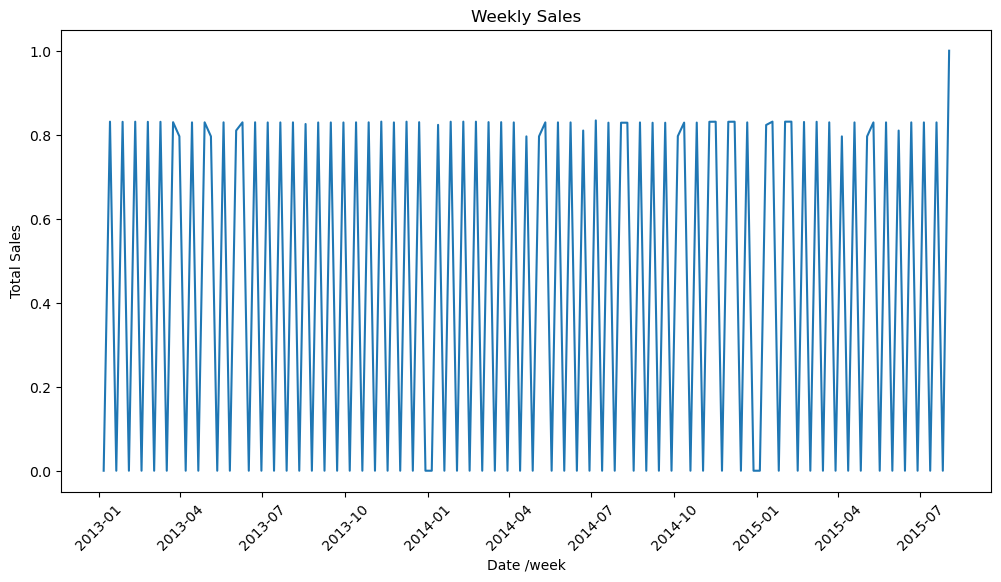

In [319]:
# Data 
x= promos_weekly["Date"]
y= promos_weekly["Promo"]

# Plot
plt.figure(figsize=(12,6))
plt.plot(x,y)

#Labels

plt.xlabel("Date /week")
plt.ylabel("Total Sales")
plt.title("Weekly Sales")
plt.xticks(rotation=45)





plt.show()

Merge sales + promo dfs

In [320]:
promos_sales_weekly= pd.merge(sales_weekly,promos_weekly, on="Date")
promos_sales_weekly.head()

,Date,Sales,Promo
0,2013-01-06,26129335,0.000000
1,2013-01-13,49275222,0.831102
2,2013-01-20,34377765,0.000000
3,2013-01-27,46040169,0.830758
4,2013-02-03,38466029,0.000000


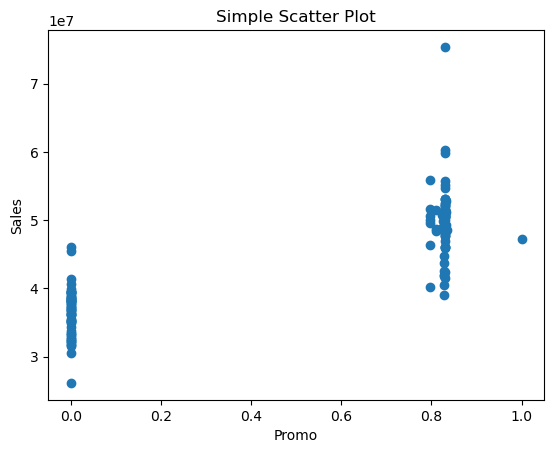

In [321]:
# Visualize correlation between sales and promos 
# Example data
x = promos_sales_weekly["Promo"]
y = promos_sales_weekly["Sales"]

# Create scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("Promo")
plt.ylabel("Sales")
plt.title("Simple Scatter Plot")

# Show the plot
plt.show()

Promotional weeks produce a strong incremental lift in total weekly sales

## Add calendar & seasonal features 

Goal: enrich the dataset with time-based control variables that capture natural sales variation.
To avoid false attribution, ensuring sales peaks aren’t wrongly credited to promotions.

To separate natural cycles (like holidays or weather) from the true marketing or promo impact.

To make the model’s ROI estimates realistic and unbiased across time.

In [322]:
# Extract month, year, and week number, trend(count var).

promos_sales_weekly["Year"]= promos_sales_weekly["Date"].dt.year
promos_sales_weekly["Month"]= promos_sales_weekly["Date"].dt.month
promos_sales_weekly["Week_num"]= promos_sales_weekly["Date"].dt.isocalendar().week
promos_sales_weekly["trend"]= promos_sales_weekly.index 
promos_sales_weekly["trend"]+=1

promos_sales_weekly.head()


,Date,Sales,Promo,Year,Month,Week_num,trend
0,2013-01-06,26129335,0.000000,2013,1,1,1
1,2013-01-13,49275222,0.831102,2013,1,2,2
2,2013-01-20,34377765,0.000000,2013,1,3,3
3,2013-01-27,46040169,0.830758,2013,1,4,4
4,2013-02-03,38466029,0.000000,2013,2,5,5


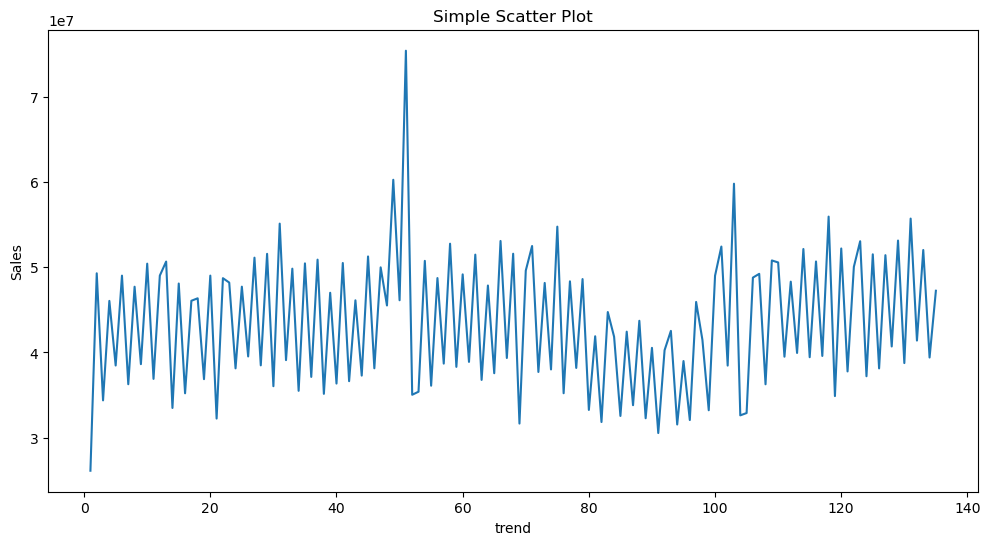

In [323]:
# plot sales vs trend
plt.figure(figsize=(12,6))
x = promos_sales_weekly["trend"]
y = promos_sales_weekly["Sales"]

# Create scatter plot
plt.plot(x, y)

# Add labels and title
plt.xlabel("trend")
plt.ylabel("Sales")
plt.title("Simple Scatter Plot")

# Show the plot
plt.show()

## Adding calendar control variables
- StateHoliday

- SchoolHoliday

Then we’ll aggregate them by week, just like we did with Promo, and merge them into the weekly dataset.

StateHoliday = big national events → structural impact on store openings and traffic.

SchoolHoliday = local/regional seasonality → shifts in family-related consumption.

Both explain natural demand fluctuations unrelated to marketing or promos — so adding them helps your model avoid falsely crediting ads or promotions for those changes.

In [324]:
sample_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


- StateHoliday	max()	If any day in the week is a public/state holiday → mark the week as 1
- SchoolHoliday	mean()	Share of days in that week affected by school closure (0–1)

In [325]:
# Convert 'a', 'b', 'c' → 1
# Convert '0' → 0
sample_data["StateHoliday"] = sample_data["StateHoliday"].isin(["a","b","c"]).astype(int)

holidays_weekly = (
    sample_data.groupby(pd.Grouper(key="Date", freq="W"))
    .agg({
        "StateHoliday": "max",     # if any holiday in the week → 1
        "SchoolHoliday": "mean"    # proportion of days with school closure
    })
    .reset_index()
)

holidays_weekly.head()

,Date,StateHoliday,SchoolHoliday
0,2013-01-06,1,0.740103
1,2013-01-13,0,0.083471
2,2013-01-20,0,0.000000
3,2013-01-27,0,0.000000
4,2013-02-03,0,0.019199
